## Linear Regression - Bike Sharing Assignment

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.  


**Business Goals:**

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Section - 1: Importing Libraries

In [126]:
#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [127]:
#data preparation
import numpy as np
import pandas as pd

#data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#data modeling libraries sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#data modeling libraries from statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#checking the score
from sklearn.metrics import r2_score

### Section - 2: Loading and Understanding the data

In [128]:
df = pd.read_csv("day.csv")

In [129]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [131]:
#checking the shape
df.shape

(730, 16)

In [132]:
#getting the stats
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###### Data Understandings:

- Number of Rows = 730
- Number of Columns = 16

### Section - 3: Exploratory Data Analysis

#### 3.1 Data Preparation & Data Cleaning

##### 3.1.1 Checking for null values

In [133]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values there.

#### 3.2 Univariate Analysis

In [134]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

##### 3.2.1 - Analysing instant column

In [135]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [136]:
df.instant

0        1
1        2
2        3
3        4
4        5
      ... 
725    726
726    727
727    728
728    729
729    730
Name: instant, Length: 730, dtype: int64

###### Conc:

instant column is acting as a index or serial number. So let's drop it.

In [137]:
df.drop(['instant'],axis=1,inplace=True)

##### 3.2.2 - Analysing dteday column

In [138]:
df.dteday.dtype

dtype('O')

In [139]:
df.dteday.min()

'01-01-2018'

In [140]:
df.dteday.max()

'31-12-2019'

###### Conc:
- The given data values were taken from 01-01-2018 to 31-12-2019.
- All the month, weekday and year given as a seperate columns.
- So let's drop this column.

In [141]:
df.drop('dteday',axis=1,inplace=True)

### 3.3 Understanding the the target variable

We are going to compare the last three columns which is given as a `casual`,`registered` and `cnt`. 

- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

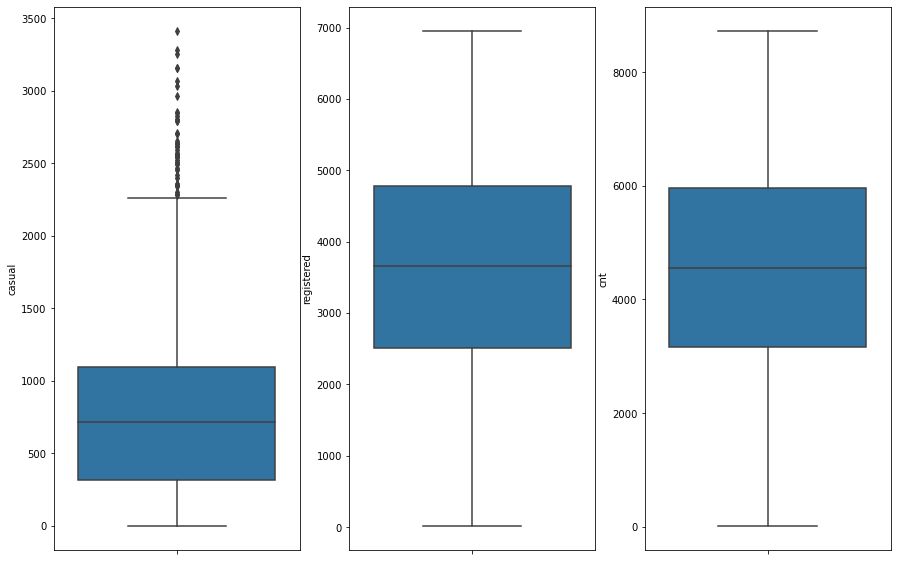

In [142]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.boxplot(y = df.casual)
plt.subplot(1,3,2)
sns.boxplot(y = df.registered)
plt.subplot(1,3,3)
sns.boxplot(y = df.cnt)
plt.show()

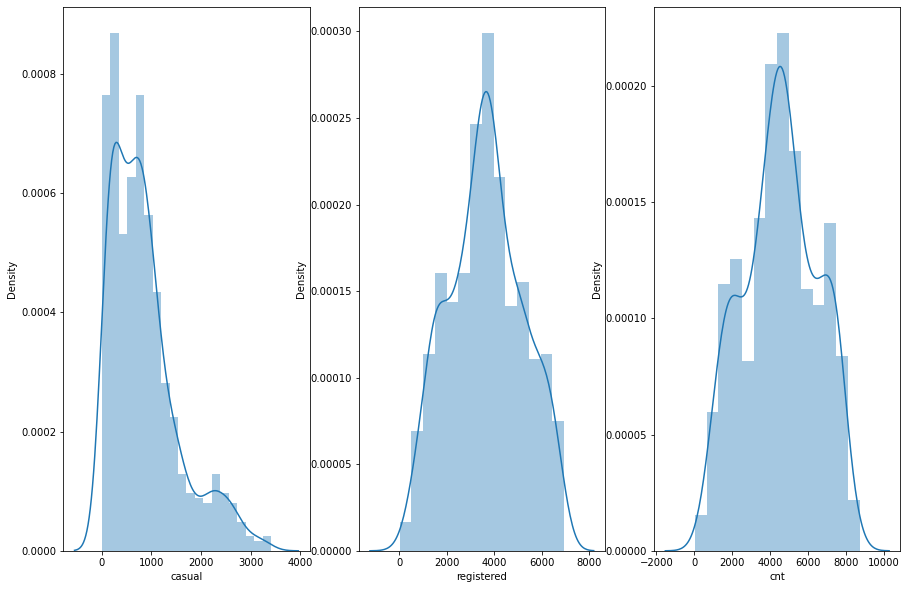

In [143]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.distplot(df.casual)
plt.subplot(1,3,2)
sns.distplot(df.registered)
plt.subplot(1,3,3)
sns.distplot(df.cnt)
plt.show()

##### Observations:

- `registerd` and `cnt` columns showing a proper distribution and also showing no outliers.
- At the same time, when we observe the `casual` variable, it exhibits many outliers and showing a unproper gaussian distribution.

In [144]:
df[['casual','registered','cnt']].describe()

,casual,registered,cnt
count,730.000000,730.000000,730.000000
mean,849.249315,3658.757534,4508.006849
std,686.479875,1559.758728,1936.011647
min,2.000000,20.000000,22.000000
25%,316.250000,2502.250000,3169.750000
50%,717.000000,3664.500000,4548.500000
75%,1096.500000,4783.250000,5966.000000
max,3410.000000,6946.000000,8714.000000


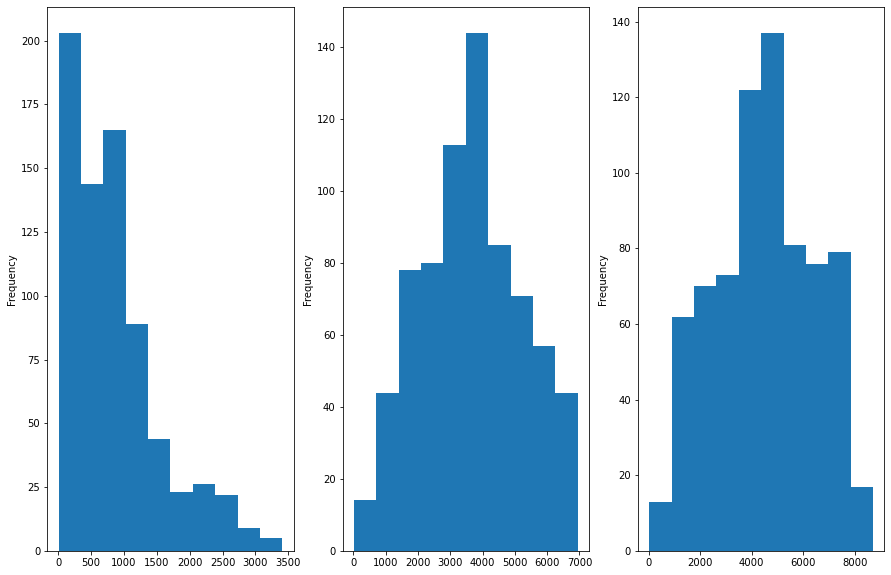

In [145]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
df.casual.plot(kind='hist')
plt.subplot(1,3,2)
df.registered.plot(kind='hist')
plt.subplot(1,3,3)
df.cnt.plot(kind='hist')
plt.show()

###### Let's plot a heatmap

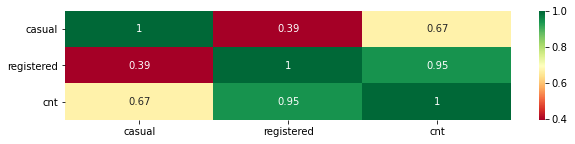

In [146]:
#using pearlson correlation
plt.figure(figsize=(10,2))
sns.heatmap(df[['casual','registered','cnt']].corr(),annot=True,cmap = "RdYlGn")
plt.show()

So registered and c

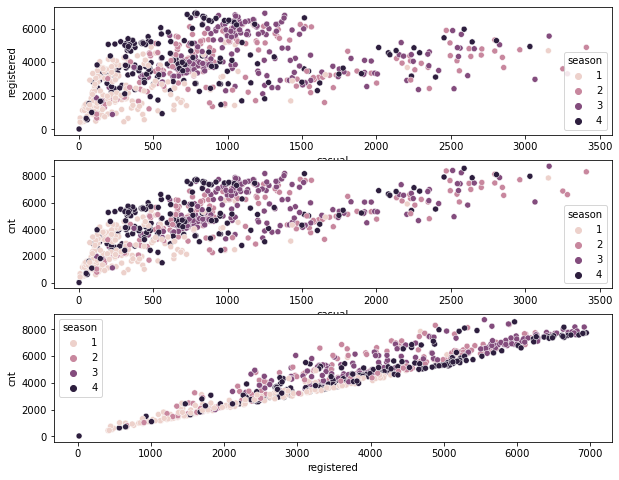

In [147]:
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
sns.scatterplot(data = df, x = 'casual', y = 'registered', hue = 'season')
plt.subplot(3,1,2)
sns.scatterplot(data=df, x="casual", y="cnt", hue="season")
plt.subplot(3,1,3)
sns.scatterplot(data=df, x="registered", y="cnt", hue="season")
plt.show()

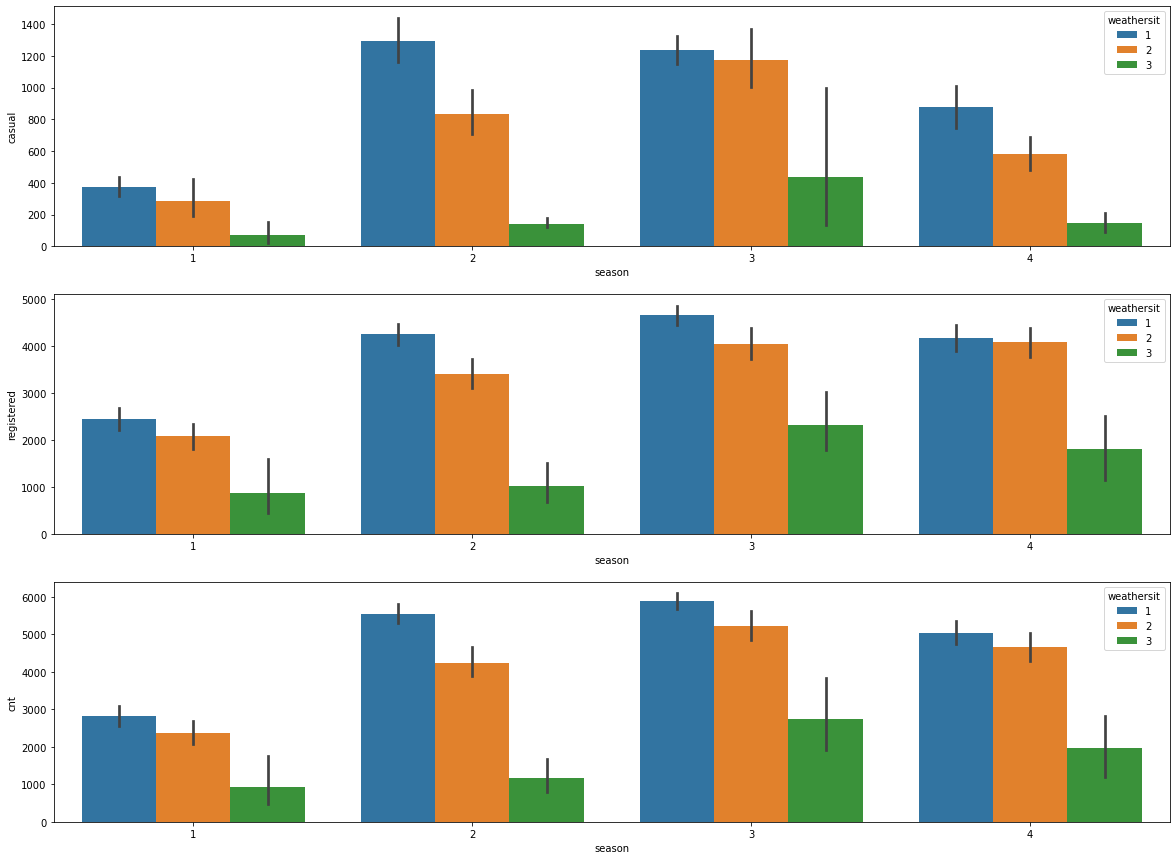

In [148]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.barplot('season','casual',hue='weathersit', data=df)
plt.subplot(3,1,2)
sns.barplot('season','registered',hue='weathersit', data=df)
plt.subplot(3,1,3)
sns.barplot('season','cnt',hue='weathersit', data=df)
plt.show()

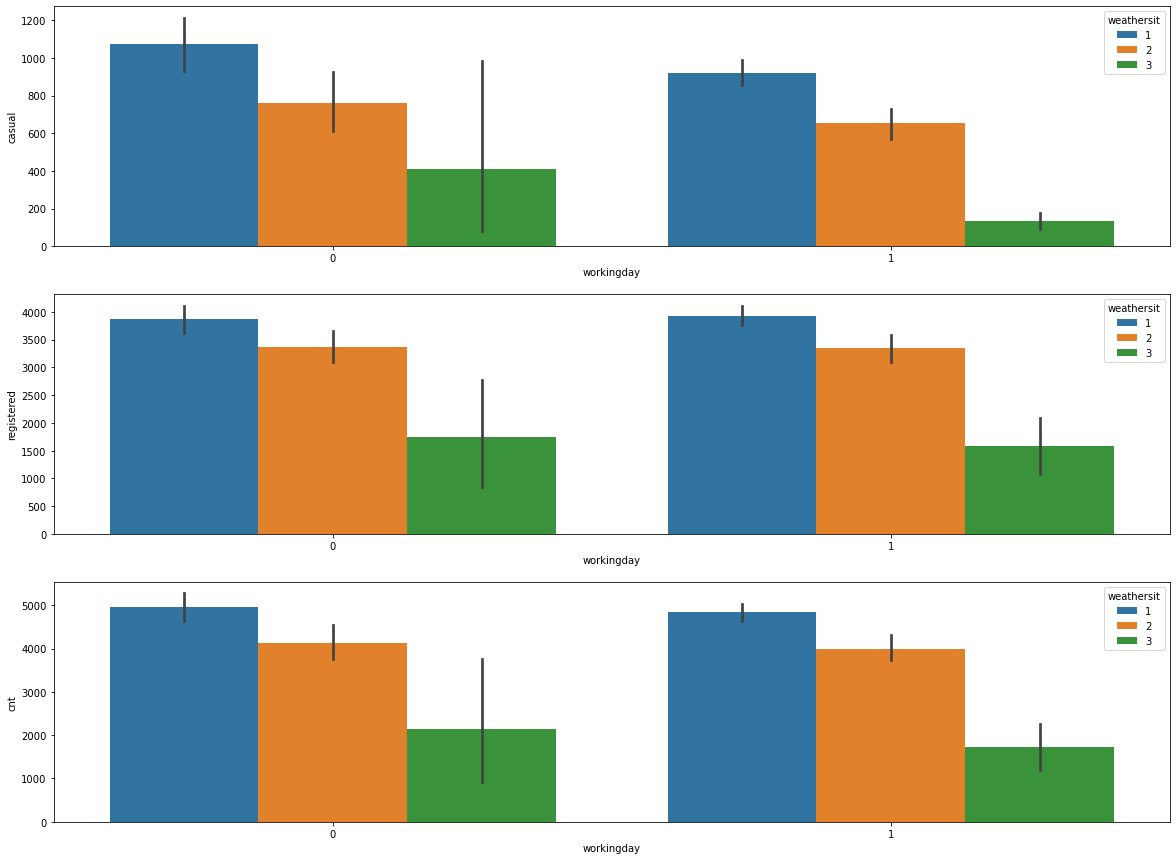

In [149]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.barplot('workingday','casual',hue='weathersit', data=df)
plt.subplot(3,1,2)
sns.barplot('workingday','registered',hue='weathersit', data=df)
plt.subplot(3,1,3)
sns.barplot('workingday','cnt',hue='weathersit', data=df)
plt.show()

###### Understading:


	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    
which means that $$ cnt = casual + registered $$

- So going further with the columns `registered` and `casual` may create a error in future and at the same time we may get endup with dropping the importtant variables. So let's drop it now.

In [150]:
df.drop(['casual','registered'],inplace=True, axis = 1)

##### 3.2.3 - Analysing Season Variable

- season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [151]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [152]:
# Converting 'Season' to a categorical variable
df['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)
df['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

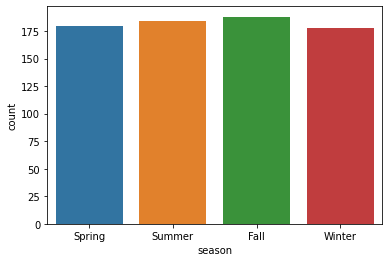

In [153]:
sns.countplot(data = df, x = 'season')
plt.show()

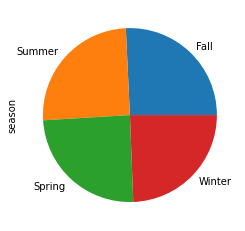

In [154]:
df['season'].value_counts(normalize = True).plot.pie()
df['season']= df.season.astype('category')
plt.show()

###### Understandings:

- Proceeding with the numbers may create error in understanding the data.
- So all the numbers changed as a particular season and assigned as a categorical value.

##### 3.2.4 - Analysing Year Variable

- yr : year (0: 2018, 1:2019)

In [155]:
df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [156]:
# Converting 'Season' to a categorical variable
df['yr'].replace([0,1], [2018,2019], inplace = True)
df['yr'].value_counts()

2018    365
2019    365
Name: yr, dtype: int64

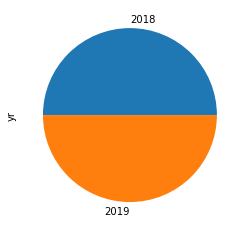

In [157]:
df['yr'].value_counts(normalize = True).plot.pie()
df['yr']= df.yr.astype('category')
plt.show()

###### Understandings:

- Proceeding with the numbers may create error in understanding the data.
- So all the numbers changed as a particular year and assigned as a categorical value.

##### 3.2.5 - Analysing Month Variable

- mnth : month ( 1 to 12)

In [158]:
import calendar

df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df['mnth']= df.mnth.astype('category')
df.mnth.dtype

CategoricalDtype(categories=['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
                  'May', 'Nov', 'Oct', 'Sep'],
, ordered=False)

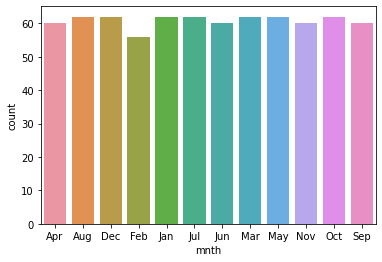

In [159]:
sns.countplot(data=df, x='mnth')
df['mnth']= df.mnth.astype('category')
plt.show()

###### 3.2.6 - Analysizing holiday:

- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

In [160]:
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

###### 3.2.7 Variable Weekday:

- weekday : day of the week

In [161]:
# weekday column conversion to categorical
df.weekday.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)
df['weekday']= df.weekday.astype('category')
df.weekday.dtype

CategoricalDtype(categories=['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
                  'Tuesday', 'Wednesday'],
, ordered=False)

Let's check the data for any clue

In [162]:
df.weekday.value_counts()

Monday       105
Tuesday      105
Friday       104
Saturday     104
Sunday       104
Thursday     104
Wednesday    104
Name: weekday, dtype: int64

###### 3.2.8 Variable WorkingDay

- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

In [163]:
df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

###### 3.2.8 Weathersit Variable

+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light 

In [164]:
df.weathersit.replace({1:'Good',2:'Medium',3:'Bad',4:'Worst'},inplace=True)
df['weathersit']= df.weathersit.astype('category')
df.weathersit.dtype

CategoricalDtype(categories=['Bad', 'Good', 'Medium'], ordered=False)

In [165]:
df.weathersit.value_counts()

Good      463
Medium    246
Bad        21
Name: weathersit, dtype: int64

###### Understandings:

- Proceeding with the numbers may create error in understanding the data.
- So all the numbers changed as a particular weathersit and assigned as a categorical value.

##### 3.2.9 Variables - Temp , Atemp

<AxesSubplot:xlabel='atemp', ylabel='Density'>

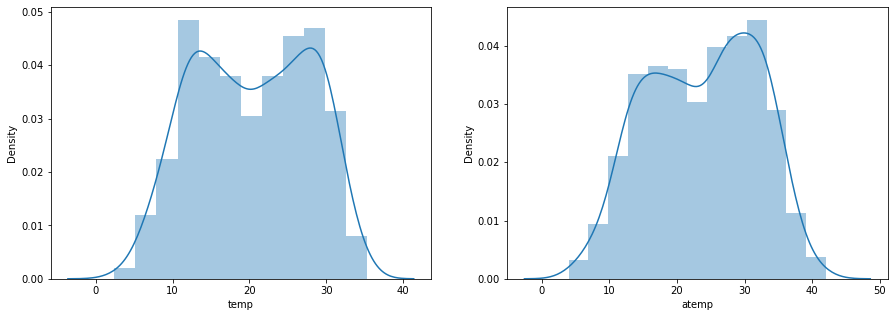

In [166]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df.temp)
plt.subplot(1,2,2)
sns.distplot(df.atemp)

##### 3.2.10 Variables - Hum , Windspeed

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

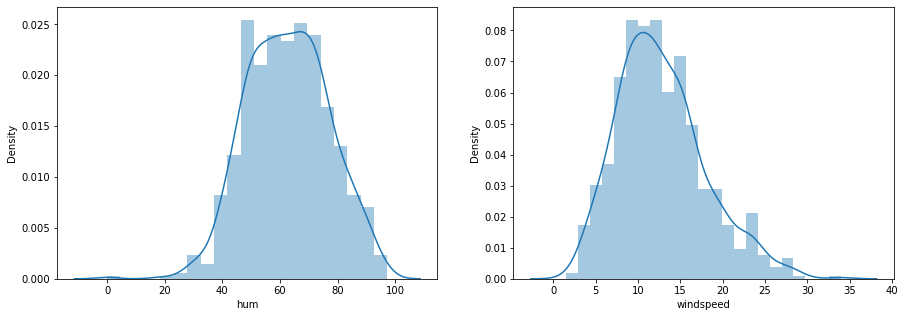

In [167]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df.hum)
plt.subplot(1,2,2)
sns.distplot(df.windspeed)

### 3.4 - Bivariate Analysis

<Figure size 432x288 with 0 Axes>

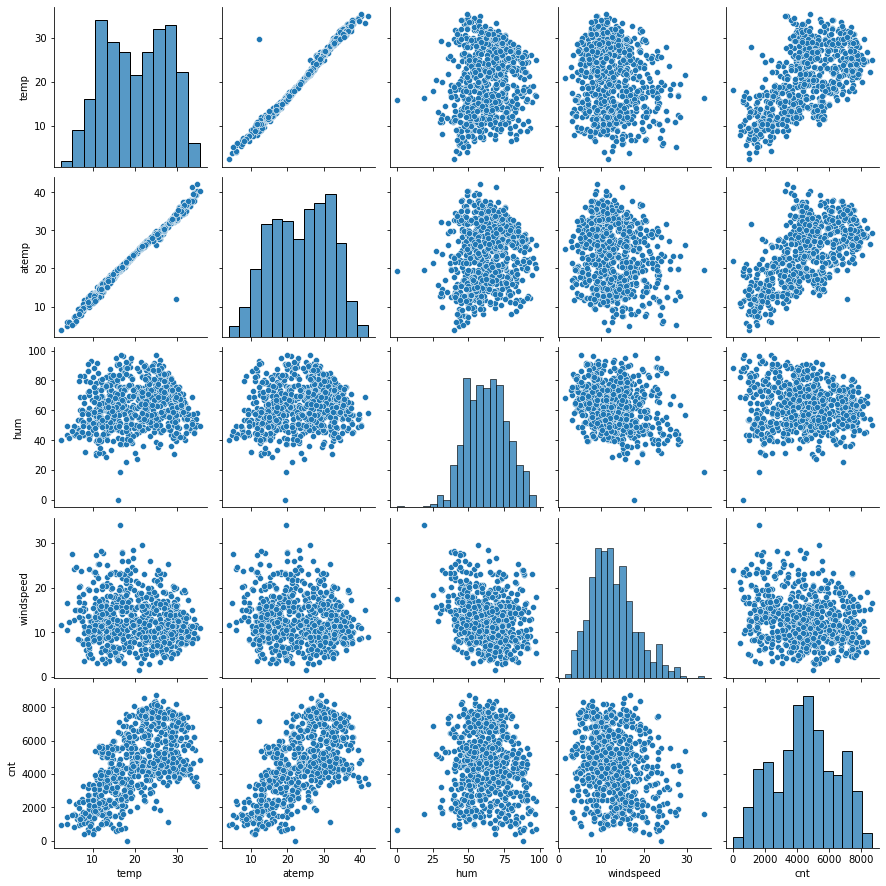

In [168]:
plt.figure(figsize=(6,4))
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

Season vs Total Count

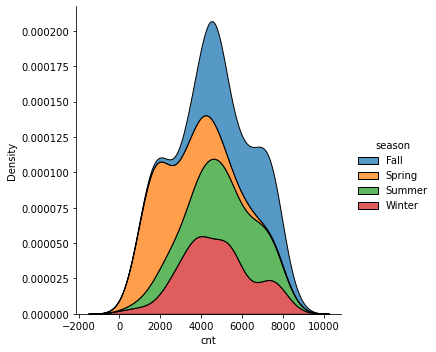

In [169]:
sns.displot(df, x="cnt", hue="season", kind="kde", multiple="stack")
plt.show()

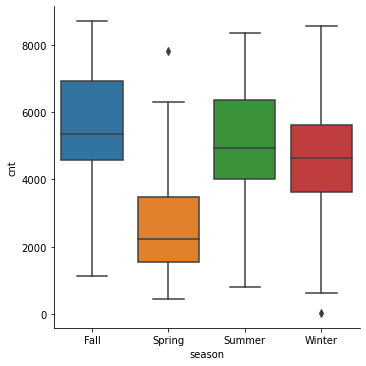

In [170]:
sns.catplot(data=df, x="season", y="cnt", kind="box")
plt.show()

Understanding:
- During Fall season mode rides were taken.
- During spring its reduced and the mean value came to near 2000.
- Count fall in the range like $$ Fall > Summer > Winter > Spring $$

Year vs Count

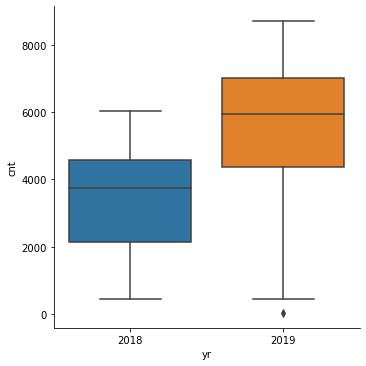

In [171]:
sns.catplot(data=df, x="yr", y="cnt", kind="box")
plt.show()

        - We got to knew that, compared to the year 2018, 2019 had more riders.
        - So we can understand that the users level increasing year by year.

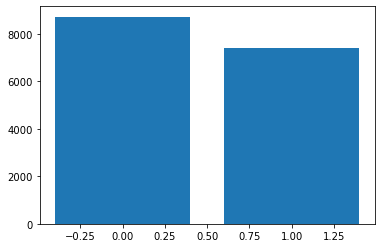

In [172]:
plt.bar(df.holiday,df.cnt)
plt.show()

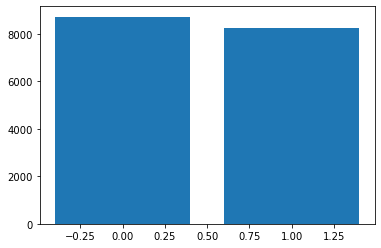

In [173]:
plt.bar(df.workingday,df.cnt)
plt.show()

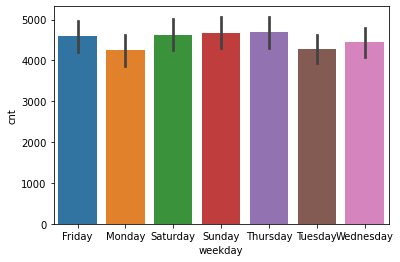

In [174]:
sns.barplot(df.weekday,df.cnt)
plt.show()

<AxesSubplot:xlabel='season,weathersit'>

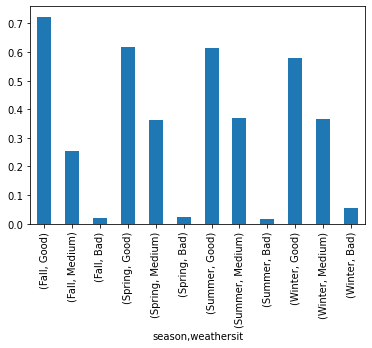

In [175]:
df.groupby('season')['weathersit'].value_counts(normalize=True).plot(kind='bar')

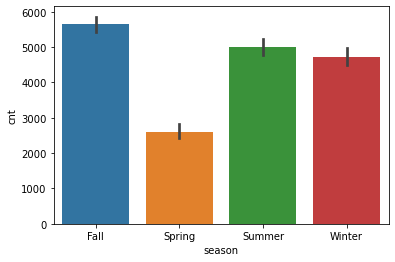

In [176]:
sns.barplot(df.season,df.cnt)
plt.show()

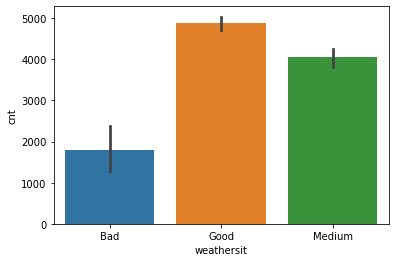

In [177]:
sns.barplot(df.weathersit,df.cnt)
plt.show()

In [178]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

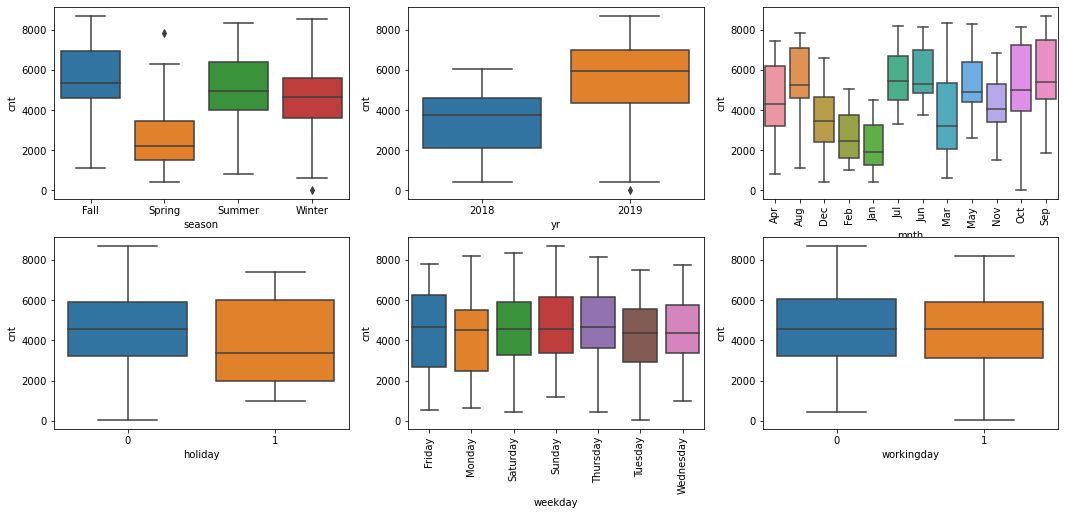

In [179]:
plt.figure(figsize=(18, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.xticks(rotation=90)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.xticks(rotation=90)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

### 3.5 - Multivariate Analysis

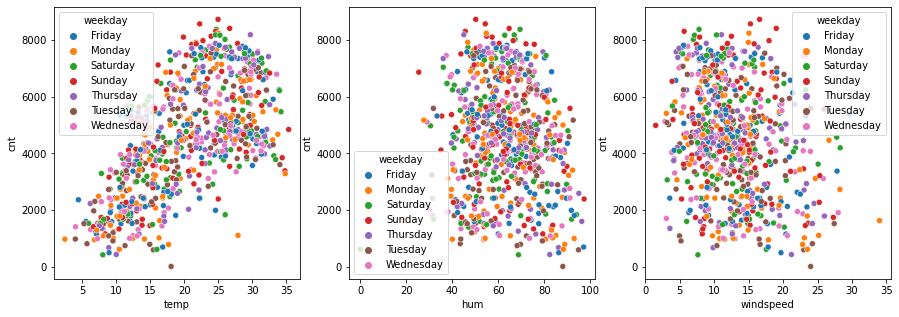

In [180]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x = 'temp', y = 'cnt', data = df,hue ='weekday')
plt.subplot(1,3,2)
sns.scatterplot(x = 'hum', y = 'cnt', data = df,hue='weekday')
plt.subplot(1,3,3)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = df,hue='weekday')
plt.show()

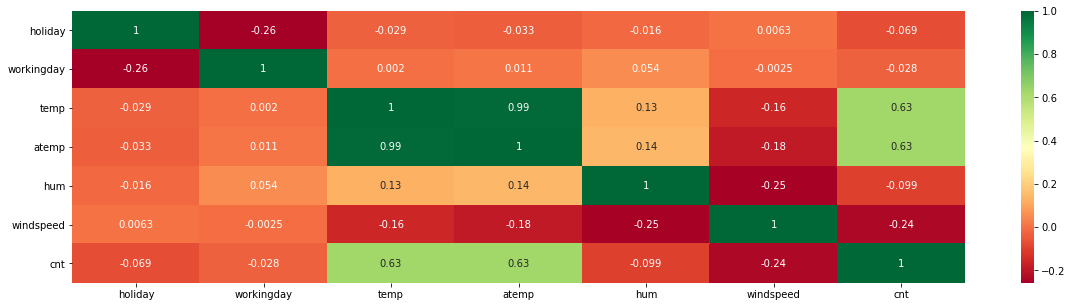

In [181]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True,cmap = "RdYlGn")
plt.show()

### Section - 4: Creating dummy variables for the categorical variables

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(5), float64(4), int64(3)
memory usage: 44.8 KB


In [183]:
df.holiday.replace({0:'No',1:'Yes'},inplace=True)
df['holiday']= df.holiday.astype('category')
df.holiday.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

In [184]:
df.workingday.replace({0:'No',1:'Yes'},inplace=True)
df['workingday']= df.workingday.astype('category')
df.workingday.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [186]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Monday,Yes,Medium,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,No,Tuesday,Yes,Medium,14.902598,17.68695,69.6087,16.652113,801


###### 4.1 Simple plottings for the better understanding

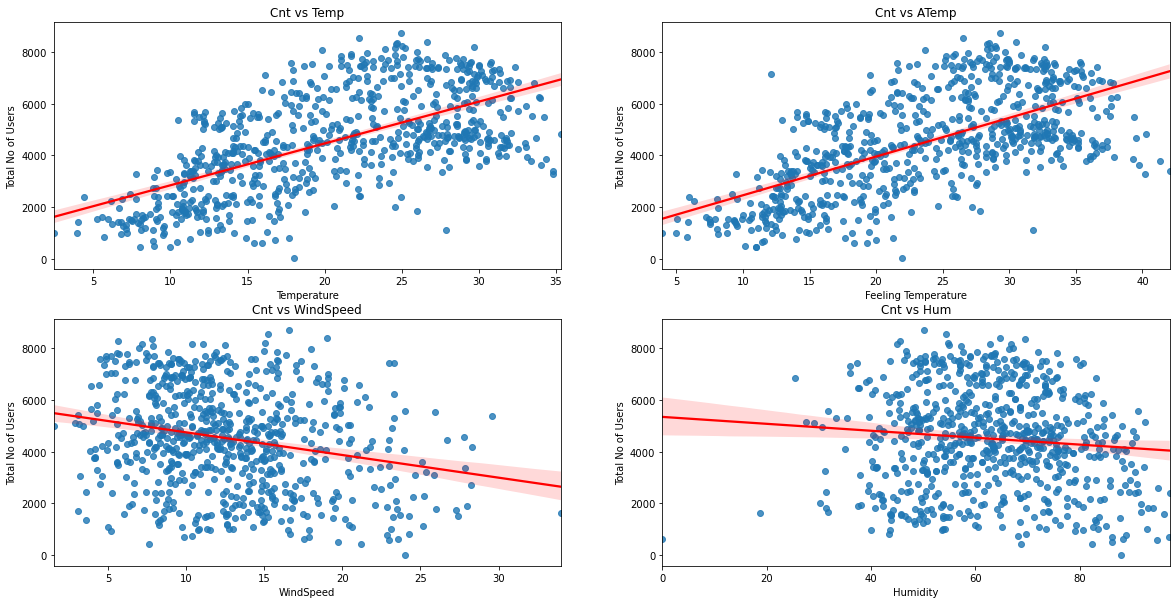

In [187]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
# Checking with regplot the correlation of cnt vs temp
plt.title("Cnt vs Temp",fontsize=12)
sns.regplot(x=df.temp,y=df.cnt, line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.ylabel("Total No of Users")


plt.subplot(2,2,2)
# Checking with regplot the correlation of cnt vs temp
plt.title("Cnt vs ATemp",fontsize=12)
sns.regplot(x=df.atemp,y=df.cnt, line_kws={"color": "red"})
plt.xlabel("Feeling Temperature")
plt.ylabel("Total No of Users")


plt.subplot(2,2,3)
# Checking with regplot the correlation of cnt vs windspeed
plt.title("Cnt vs WindSpeed",fontsize=12)
sns.regplot(x=df.windspeed,y=df.cnt, line_kws={"color": "red"})
plt.xlabel("WindSpeed")
plt.ylabel("Total No of Users")


plt.subplot(2,2,4)
# Checking with regplot the correlation of cnt vs humidity
plt.title("Cnt vs Hum",fontsize=12)
sns.regplot(x=df.hum,y=df.cnt, line_kws={"color": "red"})
plt.xlabel("Humidity")
plt.ylabel("Total No of Users")

plt.show()



In [188]:
df_new = pd.get_dummies(df)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               730 non-null    float64
 1   atemp              730 non-null    float64
 2   hum                730 non-null    float64
 3   windspeed          730 non-null    float64
 4   cnt                730 non-null    int64  
 5   season_Fall        730 non-null    uint8  
 6   season_Spring      730 non-null    uint8  
 7   season_Summer      730 non-null    uint8  
 8   season_Winter      730 non-null    uint8  
 9   yr_2018            730 non-null    uint8  
 10  yr_2019            730 non-null    uint8  
 11  mnth_Apr           730 non-null    uint8  
 12  mnth_Aug           730 non-null    uint8  
 13  mnth_Dec           730 non-null    uint8  
 14  mnth_Feb           730 non-null    uint8  
 15  mnth_Jan           730 non-null    uint8  
 16  mnth_Jul           730 non

### Section - 5: Feature Selection

###### 5.1 Seperating out the numerical columns and categorical columns

In [189]:
numerical = ['int32','float64']
numerical_columns = list(df_new.select_dtypes(include = numerical).columns)
xn = df_new[numerical_columns]

In [190]:
#using minmax scaling to put the all numerical columns in same level
scaler = MinMaxScaler()
df_new[numerical_columns] = scaler.fit_transform(df_new[numerical_columns])

In [191]:
#seperating out the feature and target
X = df_new.drop(['cnt'],axis=1)
y = df['cnt']

In [192]:
X.head(2)

,temp,atemp,hum,windspeed,season_Fall,season_Spring,season_Summer,season_Winter,yr_2018,yr_2019,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_No,workingday_Yes,weathersit_Bad,weathersit_Good,weathersit_Medium
0,0.355170,0.373517,0.828620,0.284606,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0.379232,0.360541,0.715771,0.466215,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [193]:
y.head(2)

0    985
1    801
Name: cnt, dtype: int64

###### 5.2 Spltting the test-train dataset

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

###### 5.3 Pearlson Correlation

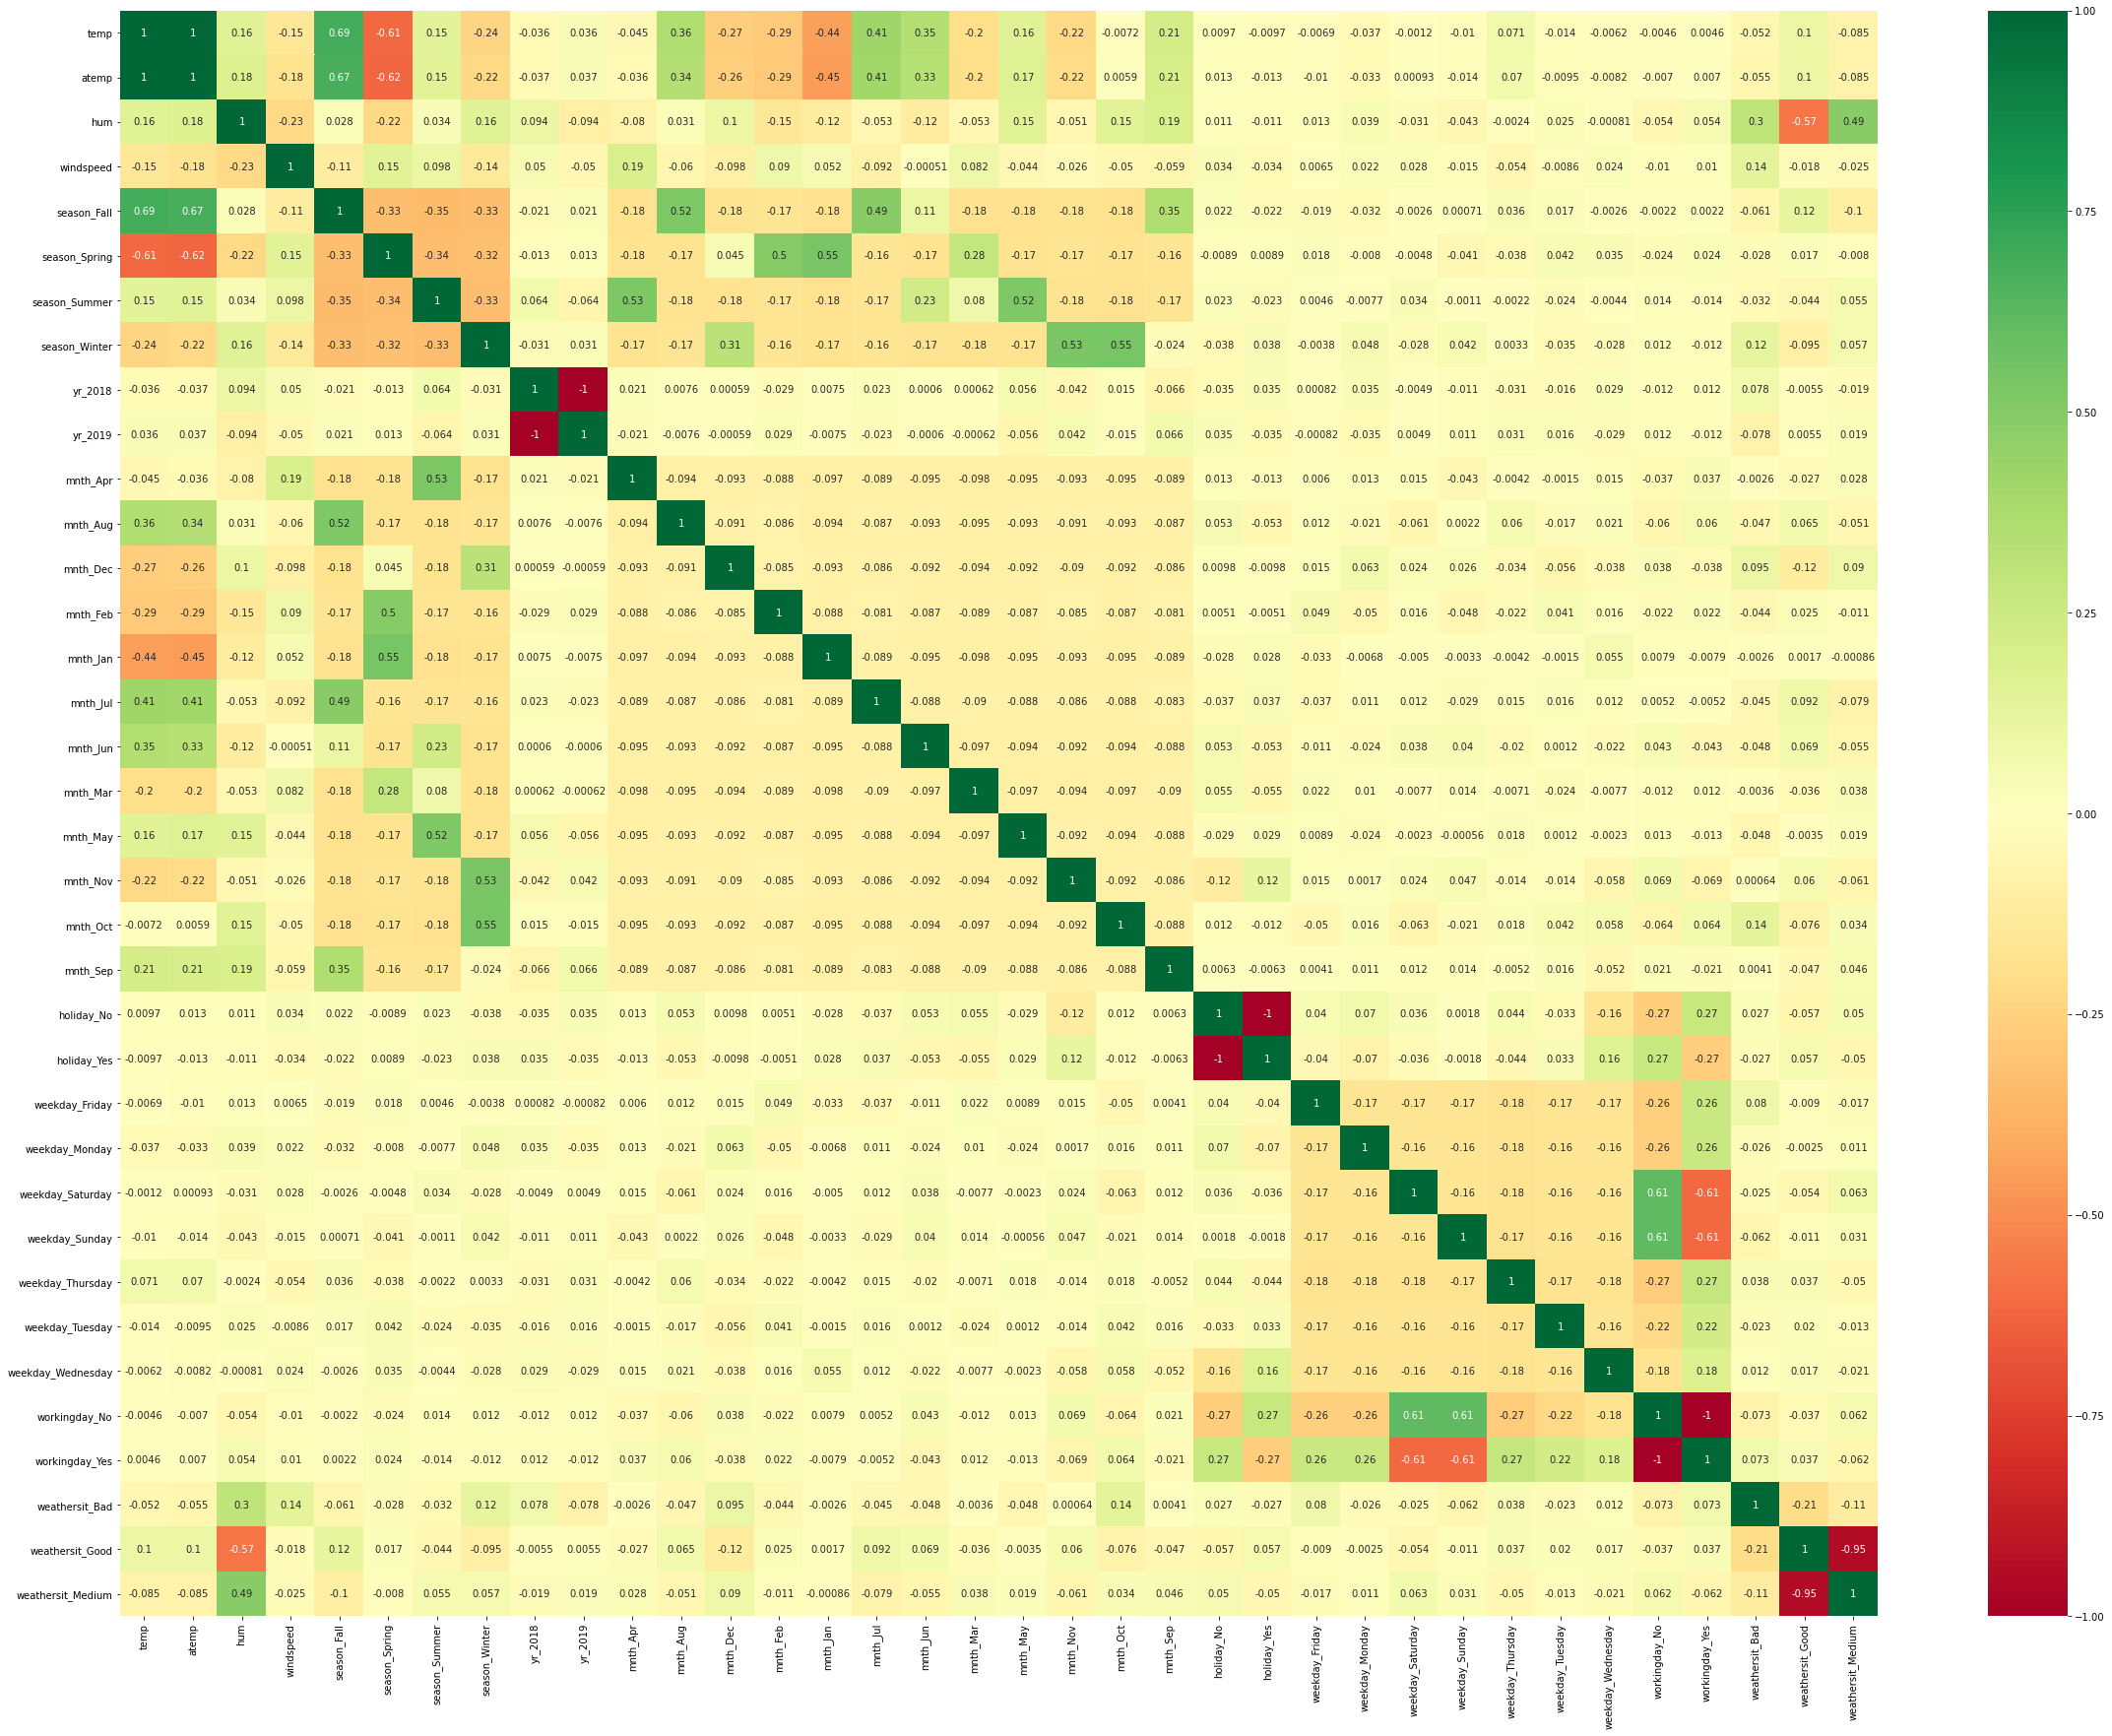

In [195]:
#using pearlson correlation

plt.figure(figsize=(40,30))
sns.heatmap(X_train.corr(), annot=True, cmap = "RdYlGn")
plt.show()

In [196]:
def cor(data, threshold):
    column_cor = set()
    cor_matrix = data.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i,j]) > threshold:
                column_name = cor_matrix.columns[i]
                column_cor.add(column_name)
    return column_cor

In [197]:
correlation_features = cor(X_train,0.9)
len(set(correlation_features))

5

In [198]:
correlation_features

{'atemp', 'holiday_Yes', 'weathersit_Medium', 'workingday_Yes', 'yr_2019'}

In [199]:
X_train.drop(correlation_features,axis=1,inplace=True)
X_test.drop(correlation_features,axis=1, inplace= True)

print('shape of X_train: ', X_train.shape)
print('shape of X_test: ', X_test.shape)

shape of X_train:  (511, 31)
shape of X_test:  (219, 31)


In the above method we did correlation analysis and removing the values which are highly correlated with other values except the target column

##### 5.4 Variance Threshold

In [200]:
from sklearn.feature_selection import VarianceThreshold
var_th = VarianceThreshold(threshold = 0)
var_th.fit(X_train)

VarianceThreshold(threshold=0)

In [201]:
constant_columns = [column for column in X_train.columns
                   if column not in X_train.columns[var_th.get_support()]]
print(len(constant_columns))

0


### Section - 6: Modeling

###### 6.1 Building a Model Using Sklearn RFE

In [202]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(estimator = lr, n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)

In [203]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Fall', False, 17),
 ('season_Spring', True, 1),
 ('season_Summer', False, 18),
 ('season_Winter', False, 4),
 ('yr_2018', True, 1),
 ('mnth_Apr', False, 5),
 ('mnth_Aug', False, 16),
 ('mnth_Dec', False, 15),
 ('mnth_Feb', False, 13),
 ('mnth_Jan', False, 12),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 3),
 ('mnth_May', False, 2),
 ('mnth_Nov', False, 14),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('holiday_No', True, 1),
 ('weekday_Friday', False, 19),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', False, 7),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 9),
 ('weekday_Tuesday', False, 21),
 ('weekday_Wednesday', False, 20),
 ('workingday_No', False, 6),
 ('weathersit_Bad', True, 1),
 ('weathersit_Good', False, 22)]

In [204]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_Spring', 'yr_2018', 'mnth_Jul',
       'mnth_Oct', 'mnth_Sep', 'holiday_No', 'weathersit_Bad'],
      dtype='object')

In [205]:
X_train.columns[~rfe.support_]

Index(['season_Fall', 'season_Summer', 'season_Winter', 'mnth_Apr', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday_No', 'weathersit_Good'],
      dtype='object')

In [206]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [207]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,holiday_No,21.012
1,hum,18.145
0,temp,11.475
2,windspeed,5.676
3,season_Spring,2.044
4,yr_2018,2.040
5,mnth_Jul,1.410
7,mnth_Sep,1.218
6,mnth_Oct,1.206
9,weathersit_Bad,1.154


###### 6.2 Building model using statsmodel, for the detailed statistics

#### Model - 1`

In [208]:
# Add a constant
X_train_lr1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lr1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.0
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          9.38e-177
Time:                        10:20:58   Log-Likelihood:                -4145.8
No. Observations:                 511   AIC:                             8314.
Df Residuals:                     500   BIC:                             8360.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5272.1165    326.130     16.

Holdiday_No showing high VIF. So let's drop it.

In [209]:
#dropping the column because of high vif value
X_train_new = X_train_rfe.drop(["holiday_No"], axis = 1)

In [210]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,11.922
0,temp,10.229
2,windspeed,4.892
4,yr_2018,2.039
3,season_Spring,1.875
5,mnth_Jul,1.403
7,mnth_Sep,1.210
6,mnth_Oct,1.204
8,weathersit_Bad,1.129


#### Model - 2

In [211]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     244.2
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          6.74e-177
Time:                        10:20:58   Log-Likelihood:                -4148.3
No. Observations:                 511   AIC:                             8317.
Df Residuals:                     501   BIC:                             8359.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5722.5393    256.453     22.

`hum` and `temp` showing the vif value of above 5. Let's drop hum and check further.

In [212]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [213]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.65
1,windspeed,4.65
3,yr_2018,1.91
2,season_Spring,1.56
4,mnth_Jul,1.34
6,mnth_Sep,1.20
5,mnth_Oct,1.15
7,weathersit_Bad,1.08


#### Model - 3

In [214]:
# Add a constant
X_train_lr3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lr3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     235.6
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          1.50e-164
Time:                        10:20:58   Log-Likelihood:                -4180.2
No. Observations:                 511   AIC:                             8378.
Df Residuals:                     502   BIC:                             8417.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4143.4584    179.142     23.

#### Conclusion:
- All the column variable's values are less than 5.
- All the variable's p significance value nearly 0. 

###### 6.3 Final Model Interpretation

In [215]:
print(lr3.params)

const             4143.458440
temp              3706.681799
windspeed        -1060.638382
season_Spring    -1113.268756
yr_2018          -1980.281144
mnth_Jul          -523.690781
mnth_Oct           508.447662
mnth_Sep           409.215831
weathersit_Bad   -2054.862765
dtype: float64


**F Statistics:**

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
- F-statistic: 235.6
- Prob (F-statistic): 1.50e-164
- The F-Statistics value of 235.6 (which is greater than 1).
- p-value of '~0.0000' states that the overall model is significant.

### Section - 7 - Residual Analysis

In [216]:
#predicting y train set using our model
y_train_pred = lr3.predict(X_train_lr3)

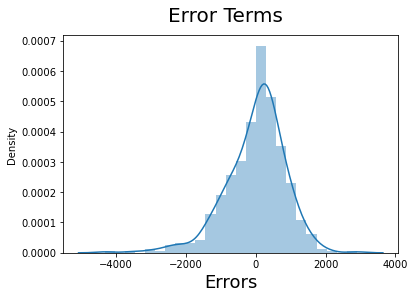

In [217]:
residual = y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residual), bins = 25)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [218]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.652
1,windspeed,4.650
3,yr_2018,1.910
2,season_Spring,1.559
4,mnth_Jul,1.336
6,mnth_Sep,1.199
5,mnth_Oct,1.151
7,weathersit_Bad,1.076


VIF value's of all the variable is less than 5.

In [219]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lr3 = sm.add_constant(X_test)
X_test_lr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 196 to 200
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   temp            219 non-null    float64
 2   windspeed       219 non-null    float64
 3   season_Spring   219 non-null    uint8  
 4   yr_2018         219 non-null    uint8  
 5   mnth_Jul        219 non-null    uint8  
 6   mnth_Oct        219 non-null    uint8  
 7   mnth_Sep        219 non-null    uint8  
 8   weathersit_Bad  219 non-null    uint8  
dtypes: float64(3), uint8(6)
memory usage: 8.1 KB


In [220]:
y_pred = lr3.predict(X_test_lr3)

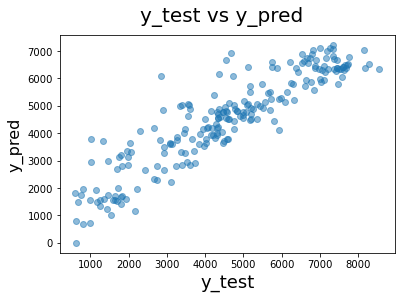

In [221]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [222]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)

0.8141386887987186


The R2 Score is 0.81413

In [223]:

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8070582578958126

Adjusted R2 for the predicted model.